# Which events were the most impactful?

#### When did they occur? What type were they? Where did they occur?
#### Quantify the damages to people and property

In [17]:
!pip install pyexasol
!pip install seaborn

In [48]:
# Load in the stuffs
import pandas as pd
import pyexasol

pd.set_option("display.max_colwidth", None)
def print_query(query, connection):
    stmt = connection.export_to_pandas(query)
    print(stmt.head())
    return stmt

host = '192.168.56.101/3D518979E1BE8B4E0A23B7A296E6AD35D5EC29DCCE01E5CC6ECBA7C9E38D8E96:8563'  # Don't forget to change the fingerprint
user = 'sys'
password = 'exasol'

# Connect to Exasol
conn = pyexasol.connect(dsn=host, 
                        user=user, 
                        password=password, 
                        debug=False, 
                        protocol_version=pyexasol.PROTOCOL_V1)

In [19]:
pd.set_option('display.max_rows', None)

In [32]:
pd.reset_option('display.max_rows')

#### Overall Human damage

In [3]:
# Top 10 most destructive events in number of injuries + deaths both direct and indirect
q = '''
SELECT 
    T.EVENT_ID, 
    T.EVENT_TYPE,
    T.REGION,
    T.BEGIN_DATE_TIME,
    T.END_DATE_TIME,
    SUM(T.INJURIES_DIRECT) AS SUM_INJURIES_DIRECT,
    SUM(T.INJURIES_INDIRECT) AS SUM_INJURIES_INDIRECT,
    SUM(T.DEATHS_DIRECT) AS SUM_DEATHS_DIRECT,
    SUM(T.DEATHS_INDIRECT) AS SUM_DEATHS_INDIRECT,
    SUM(COALESCE((T.INJURIES_DIRECT + T.INJURIES_INDIRECT + T.DEATHS_DIRECT + T.DEATHS_INDIRECT), 0)) AS HUMAN_DAMAGE,
    SUM(COALESCE((T.DAMAGE_PROPERTY + T.DAMAGE_CROPS), 0)) AS NON_HUMAN_DAMAGE
FROM 
    AOL_SCHEMA.WEATHER_EVENTS AS T
WHERE 
    MONTH(T.BEGIN_DATE_TIME) >= 3.0
GROUP BY 
    T.EVENT_ID,
    T.BEGIN_DATE_TIME,
    T.END_DATE_TIME,
    T.EVENT_TYPE,
    T.REGION
ORDER BY
    HUMAN_DAMAGE DESC
LIMIT 10;
'''

overall_human_df = print_query(q, conn)
overall_human_df

   EVENT_ID EVENT_TYPE     REGION             BEGIN_DATE_TIME  \
0   5506267    Tornado   Missouri  2006-04-02 17:54:00.000000   
1   5500766    Tornado  Tennessee  2006-04-07 13:12:00.000000   
2   5506368    Tornado  Tennessee  2006-04-02 18:32:00.000000   
3   5506369    Tornado  Tennessee  2006-04-02 19:09:00.000000   
4   5506240    Tornado   Arkansas  2006-04-02 16:46:00.000000   

                END_DATE_TIME  SUM_INJURIES_DIRECT  SUM_INJURIES_INDIRECT  \
0  2006-04-02 18:25:00.000000                  130                      0   
1  2006-04-07 13:32:00.000000                  121                      0   
2  2006-04-02 18:55:00.000000                   70                      0   
3  2006-04-02 19:31:00.000000                   42                      0   
4  2006-04-02 17:37:00.000000                   47                      0   

   SUM_DEATHS_DIRECT  SUM_DEATHS_INDIRECT  HUMAN_DAMAGE  NON_HUMAN_DAMAGE  
0                  2                    0           132               

,EVENT_ID,EVENT_TYPE,REGION,BEGIN_DATE_TIME,END_DATE_TIME,SUM_INJURIES_DIRECT,SUM_INJURIES_INDIRECT,SUM_DEATHS_DIRECT,SUM_DEATHS_INDIRECT,HUMAN_DAMAGE,NON_HUMAN_DAMAGE
0,5506267,Tornado,Missouri,2006-04-02 17:54:00.000000,2006-04-02 18:25:00.000000,130,0,2,0,132,0
1,5500766,Tornado,Tennessee,2006-04-07 13:12:00.000000,2006-04-07 13:32:00.000000,121,0,7,0,128,0
2,5506368,Tornado,Tennessee,2006-04-02 18:32:00.000000,2006-04-02 18:55:00.000000,70,0,16,0,86,0
3,5506369,Tornado,Tennessee,2006-04-02 19:09:00.000000,2006-04-02 19:31:00.000000,42,0,6,0,48,0
4,5506240,Tornado,Arkansas,2006-04-02 16:46:00.000000,2006-04-02 17:37:00.000000,47,0,0,0,47,0
5,5497925,Tornado,Missouri,2006-03-12 21:18:00.000000,2006-03-12 21:33:00.000000,26,0,4,0,30,0
6,5502578,Tornado,Iowa,2006-04-13 19:29:00.000000,2006-04-13 19:37:00.000000,30,0,0,0,30,0
7,5512771,Heat,Michigan,2006-05-29 12:00:00.000000,2006-05-29 18:00:00.000000,28,0,0,0,28,0
8,5501849,Tornado,Kentucky,2006-04-02 19:50:00.000000,2006-04-02 20:11:00.000000,22,0,0,0,22,0
9,5496254,Wildfire,Texas,2006-03-12 11:00:00.000000,2006-03-18 18:00:00.000000,8,0,12,0,20,18201000


#### Overall Non-Human damage

In [4]:
# top 10 most damaging events to property and crops in USD
q = '''
SELECT 
    T.EVENT_ID, 
    T.EVENT_TYPE,
    T.REGION,
    T.BEGIN_DATE_TIME,
    T.END_DATE_TIME,
    SUM(T.INJURIES_DIRECT) AS SUM_INJURIES_DIRECT,
    SUM(T.INJURIES_INDIRECT) AS SUM_INJURIES_INDIRECT,
    SUM(T.DEATHS_DIRECT) AS SUM_DEATHS_DIRECT,
    SUM(T.DEATHS_INDIRECT) AS SUM_DEATHS_INDIRECT,
    SUM(COALESCE((T.INJURIES_DIRECT + T.INJURIES_INDIRECT + T.DEATHS_DIRECT + T.DEATHS_INDIRECT), 0)) AS HUMAN_DAMAGE,
    SUM(COALESCE((T.DAMAGE_PROPERTY + T.DAMAGE_CROPS), 0)) AS NON_HUMAN_DAMAGE
FROM 
    AOL_SCHEMA.WEATHER_EVENTS AS T
WHERE 
    MONTH(T.BEGIN_DATE_TIME) >= 3.0
GROUP BY 
    T.EVENT_ID,
    T.BEGIN_DATE_TIME,
    T.END_DATE_TIME,
    T.EVENT_TYPE,
    T.REGION
ORDER BY
    NON_HUMAN_DAMAGE DESC 
LIMIT 10;
'''
overall_non_human_df = print_query(q, conn)
overall_non_human_df

   EVENT_ID   EVENT_TYPE      REGION             BEGIN_DATE_TIME  \
0   5498400      Drought       Texas  2006-03-01 00:00:00.000000   
1   5513319      Drought       Texas  2006-05-01 00:00:00.000000   
2   5503659     Wildfire       Texas  2006-04-11 12:00:00.000000   
3   5496255     Wildfire       Texas  2006-03-12 11:30:00.000000   
4   5497354  Debris Flow  California  2006-04-01 18:00:00.000000   

                END_DATE_TIME  SUM_INJURIES_DIRECT  SUM_INJURIES_INDIRECT  \
0  2006-03-31 23:59:00.000000                    0                      0   
1  2006-05-08 23:59:00.000000                    0                      0   
2  2006-04-13 17:00:00.000000                    2                      0   
3  2006-03-18 18:00:00.000000                    0                      0   
4  2006-04-15 12:00:00.000000                    0                      0   

   SUM_DEATHS_DIRECT  SUM_DEATHS_INDIRECT  HUMAN_DAMAGE  NON_HUMAN_DAMAGE  
0                  0                    0           

,EVENT_ID,EVENT_TYPE,REGION,BEGIN_DATE_TIME,END_DATE_TIME,SUM_INJURIES_DIRECT,SUM_INJURIES_INDIRECT,SUM_DEATHS_DIRECT,SUM_DEATHS_INDIRECT,HUMAN_DAMAGE,NON_HUMAN_DAMAGE
0,5498400,Drought,Texas,2006-03-01 00:00:00.000000,2006-03-31 23:59:00.000000,0,0,0,0,0,200001000
1,5513319,Drought,Texas,2006-05-01 00:00:00.000000,2006-05-08 23:59:00.000000,0,0,0,0,0,100001000
2,5503659,Wildfire,Texas,2006-04-11 12:00:00.000000,2006-04-13 17:00:00.000000,2,0,0,0,2,90001000
3,5496255,Wildfire,Texas,2006-03-12 11:30:00.000000,2006-03-18 18:00:00.000000,0,0,0,0,0,27201000
4,5497354,Debris Flow,California,2006-04-01 18:00:00.000000,2006-04-15 12:00:00.000000,0,0,1,0,1,20001000
5,5496254,Wildfire,Texas,2006-03-12 11:00:00.000000,2006-03-18 18:00:00.000000,8,0,12,0,20,18201000
6,5501922,Heavy Rain,California,2006-04-02 15:00:00.000000,2006-04-05 15:00:00.000000,0,0,0,0,0,16601000
7,5501923,Heavy Rain,California,2006-04-02 16:00:00.000000,2006-04-05 16:00:00.000000,0,0,0,0,0,16001000
8,5501925,Heavy Rain,California,2006-04-02 18:00:00.000000,2006-04-05 18:00:00.000000,0,0,0,0,0,9101000
9,5501932,Flood,California,2006-04-05 12:00:00.000000,2006-04-08 12:00:00.000000,0,0,0,0,0,5801000


#### Most destructive events per region

In [21]:
# Most destructive events per region with more than 0 human damage factor and more than 0 non-human damage factor
q = '''
WITH RankedEvents AS (
    SELECT 
        T.EVENT_ID, 
        T.EVENT_TYPE,
        T.REGION,
        T.BEGIN_DATE_TIME,
        T.END_DATE_TIME,
        SUM(T.INJURIES_DIRECT) AS SUM_INJURIES_DIRECT,
        SUM(T.INJURIES_INDIRECT) AS SUM_INJURIES_INDIRECT,
        SUM(T.DEATHS_DIRECT) AS SUM_DEATHS_DIRECT,
        SUM(T.DEATHS_INDIRECT) AS SUM_DEATHS_INDIRECT,
        SUM(COALESCE(T.INJURIES_DIRECT, 0) + COALESCE(T.INJURIES_INDIRECT, 0) + COALESCE(T.DEATHS_DIRECT, 0) + COALESCE(T.DEATHS_INDIRECT, 0)) AS HUMAN_DAMAGE,
        SUM(COALESCE(T.DAMAGE_PROPERTY, 0) + COALESCE(T.DAMAGE_CROPS, 0)) AS NON_HUMAN_DAMAGE,
        RANK() OVER(PARTITION BY T.REGION ORDER BY SUM(COALESCE(T.DAMAGE_PROPERTY, 0) + COALESCE(T.DAMAGE_CROPS, 0)) DESC) AS NON_HUMAN_DAMAGE_RANK,
        RANK() OVER(PARTITION BY T.REGION ORDER BY SUM(COALESCE(T.INJURIES_DIRECT, 0) + COALESCE(T.INJURIES_INDIRECT, 0) + COALESCE(T.DEATHS_DIRECT, 0) + COALESCE(T.DEATHS_INDIRECT, 0)) DESC) AS HUMAN_DAMAGE_RANK
    FROM 
        AOL_SCHEMA.WEATHER_EVENTS AS T
    WHERE 
        MONTH(T.BEGIN_DATE_TIME) >= 3.0
    GROUP BY 
        T.EVENT_ID,
        T.BEGIN_DATE_TIME,
        T.END_DATE_TIME,
        T.EVENT_TYPE,
        T.REGION
)
SELECT 
    *
FROM 
    RankedEvents
WHERE 
    (NON_HUMAN_DAMAGE_RANK = 1 
    OR HUMAN_DAMAGE_RANK = 1)
    AND HUMAN_DAMAGE > 0
    AND NON_HUMAN_DAMAGE > 0
'''

region_df = print_query(q, conn)
print(region_df.shape)
region_df

   EVENT_ID         EVENT_TYPE         REGION             BEGIN_DATE_TIME  \
0   5494873           Wildfire       Maryland  2006-03-17 08:20:00.000000   
1   5513521              Flood  Massachusetts  2006-05-13 10:30:00.000000   
2   5512489  Thunderstorm Wind  Massachusetts  2006-05-21 16:58:00.000000   
3   5513535  Thunderstorm Wind  Massachusetts  2006-05-21 16:58:00.000000   
4   5512771               Heat       Michigan  2006-05-29 12:00:00.000000   

                END_DATE_TIME  SUM_INJURIES_DIRECT  SUM_INJURIES_INDIRECT  \
0  2006-03-17 15:30:00.000000                    2                      0   
1  2006-05-15 19:00:00.000000                    0                      0   
2  2006-05-21 17:05:00.000000                    1                      0   
3  2006-05-21 17:05:00.000000                    1                      0   
4  2006-05-29 18:00:00.000000                   28                      0   

   SUM_DEATHS_DIRECT  SUM_DEATHS_INDIRECT  HUMAN_DAMAGE  NON_HUMAN_DAMAGE 

,EVENT_ID,EVENT_TYPE,REGION,BEGIN_DATE_TIME,END_DATE_TIME,SUM_INJURIES_DIRECT,SUM_INJURIES_INDIRECT,SUM_DEATHS_DIRECT,SUM_DEATHS_INDIRECT,HUMAN_DAMAGE,NON_HUMAN_DAMAGE,NON_HUMAN_DAMAGE_RANK,HUMAN_DAMAGE_RANK
0,5494873,Wildfire,Maryland,2006-03-17 08:20:00.000000,2006-03-17 15:30:00.000000,2,0,0,0,2,1000,1,1
1,5513521,Flood,Massachusetts,2006-05-13 10:30:00.000000,2006-05-15 19:00:00.000000,0,0,2,0,2,1000,1,1
2,5512489,Thunderstorm Wind,Massachusetts,2006-05-21 16:58:00.000000,2006-05-21 17:05:00.000000,1,0,0,0,1,1000,1,2
3,5513535,Thunderstorm Wind,Massachusetts,2006-05-21 16:58:00.000000,2006-05-21 17:05:00.000000,1,0,0,0,1,1000,1,2
4,5512771,Heat,Michigan,2006-05-29 12:00:00.000000,2006-05-29 18:00:00.000000,28,0,0,0,28,1000,31,1
5,5491231,Thunderstorm Wind,Mississippi,2006-03-09 15:27:00.000000,2006-03-09 15:43:00.000000,3,0,0,0,3,1000,16,1
6,5505505,Thunderstorm Wind,Mississippi,2006-05-04 19:08:00.000000,2006-05-04 19:12:00.000000,3,0,0,0,3,1000,16,1
7,5506267,Tornado,Missouri,2006-04-02 17:54:00.000000,2006-04-02 18:25:00.000000,130,0,2,0,132,1000,2,1
8,5507865,High Wind,Nebraska,2006-05-26 23:00:00.000000,2006-05-26 23:40:00.000000,5,0,0,0,5,1000,6,1
9,5511947,Strong Wind,Nevada,2006-05-27 16:30:00.000000,2006-05-27 16:30:00.000000,0,0,1,0,1,1000,1,1


#### Total non-human damage by region and start month

In [9]:
q = '''
WITH NewWeatherData AS (
    SELECT 
        MONTH(BEGIN_DATE_TIME) AS BEGIN_MON,
        REGION,
        STATE_FIPS,
        COALESCE(DAMAGE_PROPERTY, 0) + COALESCE(DAMAGE_CROPS, 0) AS NON_HUMAN_DESTRUCTION
    FROM 
        AOL_SCHEMA.WEATHER_EVENTS
    WHERE
        MONTH(BEGIN_DATE_TIME) >= 3.0
)
SELECT 
    BEGIN_MON,
    REGION,
    STATE_FIPS,
    SUM(NON_HUMAN_DESTRUCTION) AS TOTAL_DESTRUCTION
FROM 
    NewWeatherData
GROUP BY 
    CUBE(BEGIN_MON, REGION, STATE_FIPS)
ORDER BY 
    BEGIN_MON,
    REGION;
'''

cube_non_human_df = print_query(q, conn)
print(cube_non_human_df.shape)
cube_non_human_df


   BEGIN_MON   REGION  STATE_FIPS  TOTAL_DESTRUCTION
0        3.0  Alabama         1.0              82000
1        3.0  Alabama         NaN              82000
2        3.0   Alaska         2.0              44000
3        3.0   Alaska         NaN              44000
4        3.0  Arizona         4.0              30000
(718, 4)


,BEGIN_MON,REGION,STATE_FIPS,TOTAL_DESTRUCTION
0,3.0,Alabama,1.0,82000
1,3.0,Alabama,NaN,82000
2,3.0,Alaska,2.0,44000
3,3.0,Alaska,NaN,44000
4,3.0,Arizona,4.0,30000
5,3.0,Arizona,NaN,30000
6,3.0,Arkansas,5.0,212000
7,3.0,Arkansas,NaN,212000
8,3.0,Atlantic south,87.0,6000
9,3.0,Atlantic south,NaN,6000


#### Total human damage by region and start month

In [8]:
q = '''
WITH NewWeatherData AS (
    SELECT 
        MONTH(BEGIN_DATE_TIME) AS BEGIN_MON,
        REGION,
        STATE_FIPS,
        COALESCE(INJURIES_DIRECT, 0) + COALESCE(INJURIES_INDIRECT, 0) + COALESCE(DEATHS_DIRECT, 0) + COALESCE(DEATHS_INDIRECT, 0) AS HUMAN_DAMAGE
    FROM 
        AOL_SCHEMA.WEATHER_EVENTS
    WHERE
        MONTH(BEGIN_DATE_TIME) >= 3.0
)
SELECT 
    BEGIN_MON,
    REGION,
    STATE_FIPS,
    SUM(HUMAN_DAMAGE) AS TOTAL_HUMAN_DAMAGE
FROM 
    NewWeatherData
GROUP BY 
    CUBE(BEGIN_MON, REGION, STATE_FIPS)
ORDER BY 
    BEGIN_MON,
    REGION;
'''

cube_human_df = print_query(q, conn)
print(cube_human_df.shape)
cube_human_df


   BEGIN_MON   REGION  STATE_FIPS  TOTAL_HUMAN_DAMAGE
0        3.0  Alabama         1.0                   3
1        3.0  Alabama         NaN                   3
2        3.0   Alaska         2.0                   0
3        3.0   Alaska         NaN                   0
4        3.0  Arizona         4.0                   3
(718, 4)


,BEGIN_MON,REGION,STATE_FIPS,TOTAL_HUMAN_DAMAGE
0,3.0,Alabama,1.0,3
1,3.0,Alabama,NaN,3
2,3.0,Alaska,2.0,0
3,3.0,Alaska,NaN,0
4,3.0,Arizona,4.0,3
5,3.0,Arizona,NaN,3
6,3.0,Arkansas,5.0,19
7,3.0,Arkansas,NaN,19
8,3.0,Atlantic south,87.0,0
9,3.0,Atlantic south,NaN,0


#### Total destruction by region and start month (both human and non human)

In [93]:
q = '''
WITH NewWeatherData AS (
    SELECT 
        MONTH(BEGIN_DATE_TIME) AS BEGIN_MON,
        REGION,
        CASE 
            -- West Region
            WHEN STATE_FIPS IN ('02', '04', '06', '08', '15', '16', '30', '32', '35', '41', '49', '53', '56') THEN 'West'
            -- Central Region
            WHEN STATE_FIPS IN ('05', '17', '18', '19', '20', '26', '27', '29', '31', '38', '39', '46', '48', '55') THEN 'Central'
            -- East Region
            WHEN STATE_FIPS IN ('01', '09', '10', '11', '12', '13', '21', '22', '23', '24', '25', '28', '33', '34', '36', '37', '40', '42', '44', '45', '47', '50', '51', '54') THEN 'East'
            ELSE 'Unknown'
        END AS TRISECTION,
        COALESCE(INJURIES_DIRECT, 0) + COALESCE(INJURIES_INDIRECT, 0) + COALESCE(DEATHS_DIRECT, 0) + COALESCE(DEATHS_INDIRECT, 0) AS HUMAN_DAMAGE,
        COALESCE(DAMAGE_PROPERTY, 0) + COALESCE(DAMAGE_CROPS, 0) AS NON_HUMAN_DAMAGE
    FROM
        AOL_SCHEMA.WEATHER_EVENTS
    WHERE
        MONTH(BEGIN_DATE_TIME) >= 3.0
)
SELECT 
    BEGIN_MON,
    REGION,
    TRISECTION,
    SUM(HUMAN_DAMAGE) AS TOTAL_HUMAN_DAMAGE,
    SUM(NON_HUMAN_DAMAGE) AS TOTAL_NON_HUMAN_DAMAGE
FROM 
    NewWeatherData
GROUP BY 
    CUBE(BEGIN_MON, REGION, TRISECTION)
HAVING
    SUM(HUMAN_DAMAGE) > 0
    AND SUM(NON_HUMAN_DAMAGE) > 0
ORDER BY
    BEGIN_MON,
    TRISECTION,
    REGION;
'''

cube_df = print_query(q, conn)
print(cube_df.shape)
cube_df

   BEGIN_MON    REGION TRISECTION  TOTAL_HUMAN_DAMAGE  TOTAL_NON_HUMAN_DAMAGE
0        3.0  Arkansas    Central                  19                  175000
1        3.0  Illinois    Central                  39                  300000
2        3.0   Indiana    Central                   3                  163000
3        3.0      Iowa    Central                   3                  220000
4        3.0    Kansas    Central                   5                  296000
(262, 5)


,BEGIN_MON,REGION,TRISECTION,TOTAL_HUMAN_DAMAGE,TOTAL_NON_HUMAN_DAMAGE
0,3.0,Arkansas,Central,19,175000
1,3.0,Illinois,Central,39,300000
2,3.0,Indiana,Central,3,163000
3,3.0,Iowa,Central,3,220000
4,3.0,Kansas,Central,5,296000
...,...,...,...,...,...
257,NaN,Virginia,NaN,3,215000
258,NaN,Washington,NaN,3,49000
259,NaN,West virginia,NaN,3,104000
260,NaN,Wisconsin,NaN,7,403000


In [59]:
pd.set_option("display.max_rows", None)

In [92]:
pd.reset_option("display.max_rows")

#### INFO EXTRACTION

In [11]:
# Note the most destructive month in terms of personel and property damage
# Note the most destructive state in terms of personel and property damage
# Note totals across all months and locales


# Note, all maximums are over a 3 month period march 2006 to may 2006
print("All maximums are over a 3 month period march 2006 to may 2006\n\n")

# Maximum month:
month_filtered_df = cube_df.loc[pd.isna(cube_df['REGION'])].loc[pd.notna(cube_df['BEGIN_MON'])]
print("MAX human damage month:\n", month_filtered_df.loc[month_filtered_df['TOTAL_HUMAN_DAMAGE'].idxmax()][['BEGIN_MON', 'TOTAL_HUMAN_DAMAGE', 'TOTAL_NON_HUMAN_DAMAGE']])  # Month, damages, with max human damage 
print("\n\nMAX non-human damage month:\n", month_filtered_df.loc[month_filtered_df['TOTAL_NON_HUMAN_DAMAGE'].idxmax()][['BEGIN_MON', 'TOTAL_HUMAN_DAMAGE', 'TOTAL_NON_HUMAN_DAMAGE']])  # Month, damages, with max non human damage


# Maximum Region:
region_filtered_df = cube_df.loc[pd.isna(cube_df['BEGIN_MON'])].loc[pd.notna(cube_df['REGION'])]
print("\n\nMAX human damage region:\n", region_filtered_df.loc[region_filtered_df['TOTAL_HUMAN_DAMAGE'].idxmax()][['REGION', 'TOTAL_HUMAN_DAMAGE', 'TOTAL_NON_HUMAN_DAMAGE']])  # Total human damage max
print("\n\nMAX non-human damage region:\n", region_filtered_df.loc[region_filtered_df['TOTAL_NON_HUMAN_DAMAGE'].idxmax()][['REGION', 'TOTAL_HUMAN_DAMAGE', 'TOTAL_NON_HUMAN_DAMAGE']])  # Total non-human damage max


# Damage Totals:
print("\n\nDamage Totals:\n", cube_df.loc[pd.isna(cube_df['REGION'])].loc[pd.isna(cube_df['BEGIN_MON'])].drop(['BEGIN_MON', 'REGION'], axis=1))  # Totals

All maximums are over a 3 month period march 2006 to may 2006




NameError: name 'cube_df' is not defined

## VISUALIZATION - HEATMAPS

#### Month x State

     BEGIN_MON          REGION  TOTAL_HUMAN_DAMAGE
0          3.0        Arkansas                  19
1          3.0        Illinois                  39
2          3.0         Indiana                   3
3          3.0            Iowa                   3
4          3.0          Kansas                   5
5          3.0        Michigan                   3
6          3.0        Missouri                 155
7          3.0        Nebraska                   4
8          3.0            Ohio                   1
9          3.0           Texas                  32
11         3.0         Alabama                   3
12         3.0        Kentucky                   1
13         3.0       Louisiana                   1
14         3.0        Maryland                   2
15         3.0     Mississippi                   6
16         3.0        Oklahoma                  26
17         3.0        Virginia                   2
19         3.0            Guam                   1
21         3.0         Arizona 

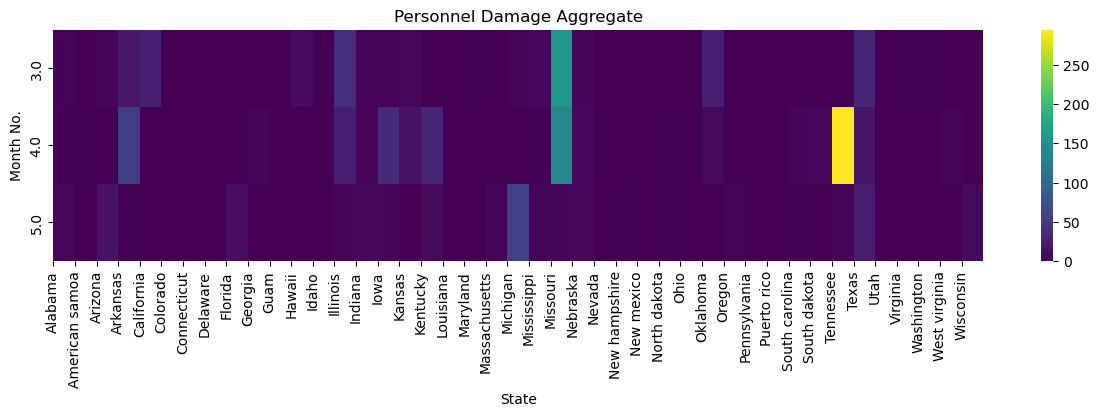

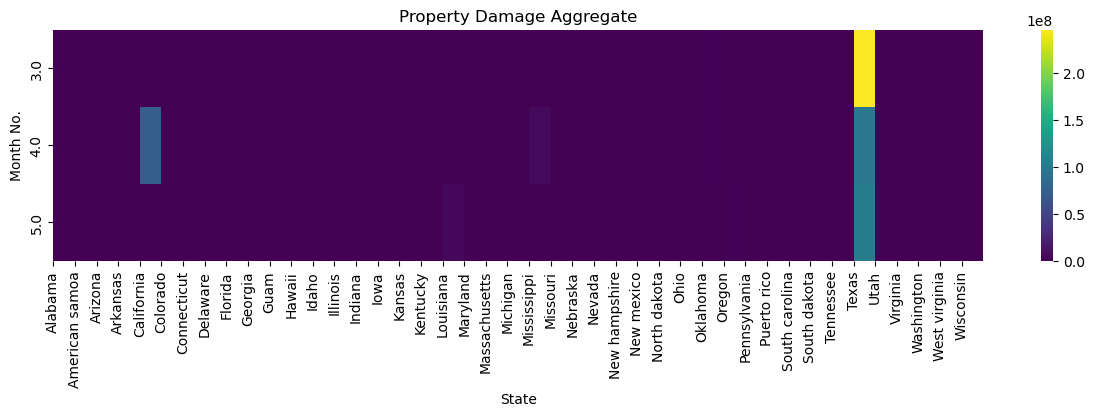

In [ ]:
# Take cube df, create a heatmap for personel damage and property damage
import matplotlib.pyplot as plt
import seaborn as sns


print(cube_df.dropna()[['BEGIN_MON', 'REGION', 'TOTAL_HUMAN_DAMAGE']])

# Human damage heatmap
human_heatmap_data = cube_df.dropna()[['BEGIN_MON', 'REGION', 'TOTAL_HUMAN_DAMAGE']].pivot(index='BEGIN_MON', columns='REGION', values='TOTAL_HUMAN_DAMAGE').fillna(0)
plt.figure(figsize=(15, 3))

sns.heatmap(human_heatmap_data, cmap="viridis")

plt.title("Personnel Damage Aggregate")
plt.xlabel("State")
plt.ylabel("Month No.")

tick_positions = range(len(human_heatmap_data.columns))
plt.xticks(ticks=tick_positions, labels=human_heatmap_data.columns, rotation=90)
plt.savefig("personnel_heatmap_state_plot.png", format="png", bbox_inches="tight")  # Save as PNG
plt.show()


# Non human damage heatmap
non_human_heatmap_data = cube_df.dropna().pivot(index='BEGIN_MON', columns='REGION', values='TOTAL_NON_HUMAN_DAMAGE').fillna(0)
plt.figure(figsize=(15, 3))
sns.heatmap(non_human_heatmap_data, cmap="viridis")

plt.title("Property Damage Aggregate")
plt.xlabel("State")
plt.ylabel("Month No.")

tick_positions = range(len(non_human_heatmap_data.columns))
plt.xticks(ticks=tick_positions, labels=non_human_heatmap_data.columns, rotation=90)
plt.savefig("property_heatmap_state_plot.png", format="png", bbox_inches="tight")  # Save as PNG
plt.show()


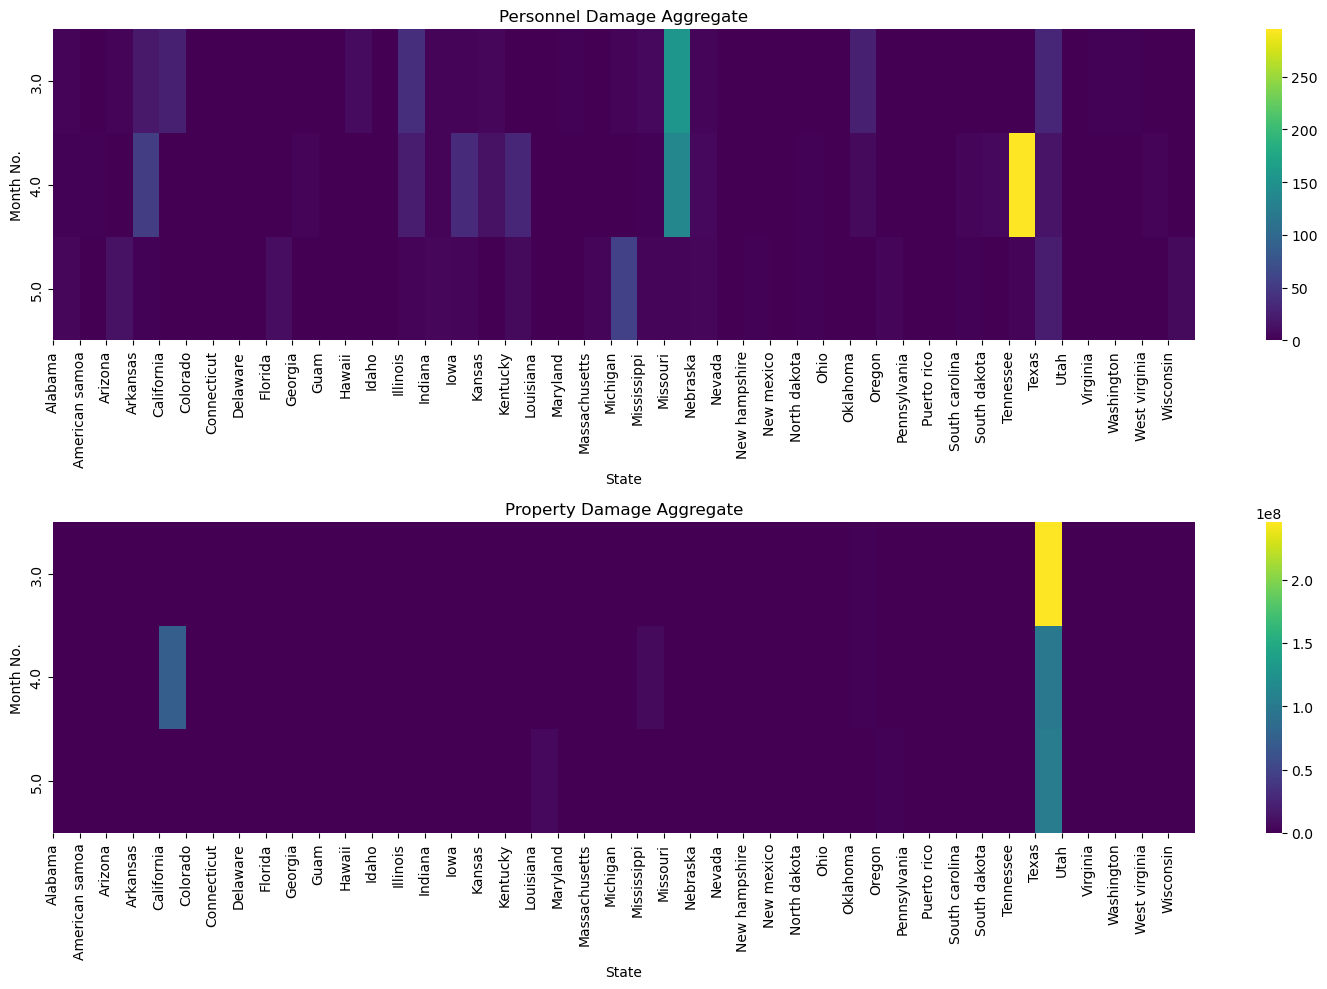

In [74]:
# Assuming cube_df is already defined

# Prepare the data for both heatmaps
human_heatmap_data = cube_df.dropna()[['BEGIN_MON', 'REGION', 'TOTAL_HUMAN_DAMAGE']].pivot(index='BEGIN_MON', columns='REGION', values='TOTAL_HUMAN_DAMAGE').fillna(0)
non_human_heatmap_data = cube_df.dropna().pivot(index='BEGIN_MON', columns='REGION', values='TOTAL_NON_HUMAN_DAMAGE').fillna(0)

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot the human damage heatmap on the first subplot (first row)
sns.heatmap(human_heatmap_data, cmap="viridis", ax=axes[0])
axes[0].set_title("Personnel Damage Aggregate")
axes[0].set_xlabel("State")
axes[0].set_ylabel("Month No.")
tick_positions = range(len(human_heatmap_data.columns))
axes[0].set_xticks(tick_positions)
axes[0].set_xticklabels(human_heatmap_data.columns, rotation=90)

# Plot the non-human damage heatmap on the second subplot (second row)
sns.heatmap(non_human_heatmap_data, cmap="viridis", ax=axes[1])
axes[1].set_title("Property Damage Aggregate")
axes[1].set_xlabel("State")
axes[1].set_ylabel("Month No.")
tick_positions = range(len(non_human_heatmap_data.columns))
axes[1].set_xticks(tick_positions)
axes[1].set_xticklabels(non_human_heatmap_data.columns, rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("./../Images/combined_damage_state_heatmaps_2rows.png", format="png", bbox_inches="tight")

# Display the plot
plt.show()

#### Month x Region

In [91]:
print("Desired df")

print(cube_df[(cube_df['REGION'].isna()) & (cube_df['BEGIN_MON'].notna()) & (cube_df['TRISECTION'].notna())])
print(cube_df[(cube_df['REGION'].isna()) & (cube_df['BEGIN_MON'].isna()) & (cube_df['TRISECTION'].notna())])

Desired df
     BEGIN_MON REGION TRISECTION  TOTAL_HUMAN_DAMAGE  TOTAL_NON_HUMAN_DAMAGE
10         3.0    NaN    Central                 264               247914000
18         3.0    NaN       East                  41                 1529000
20         3.0    NaN    Unknown                   1                   32000
27         3.0    NaN       West                  42                  723000
63         4.0    NaN    Central                 294               100935000
76         4.0    NaN       East                 352                10100000
78         4.0    NaN    Unknown                   2                  168000
82         4.0    NaN       West                   3                72733000
121        5.0    NaN    Central                 112               105223000
133        5.0    NaN       East                  41                 9153300
135        5.0    NaN    Unknown                   1                  135000
141        5.0    NaN       West                  20             

(12, 5)


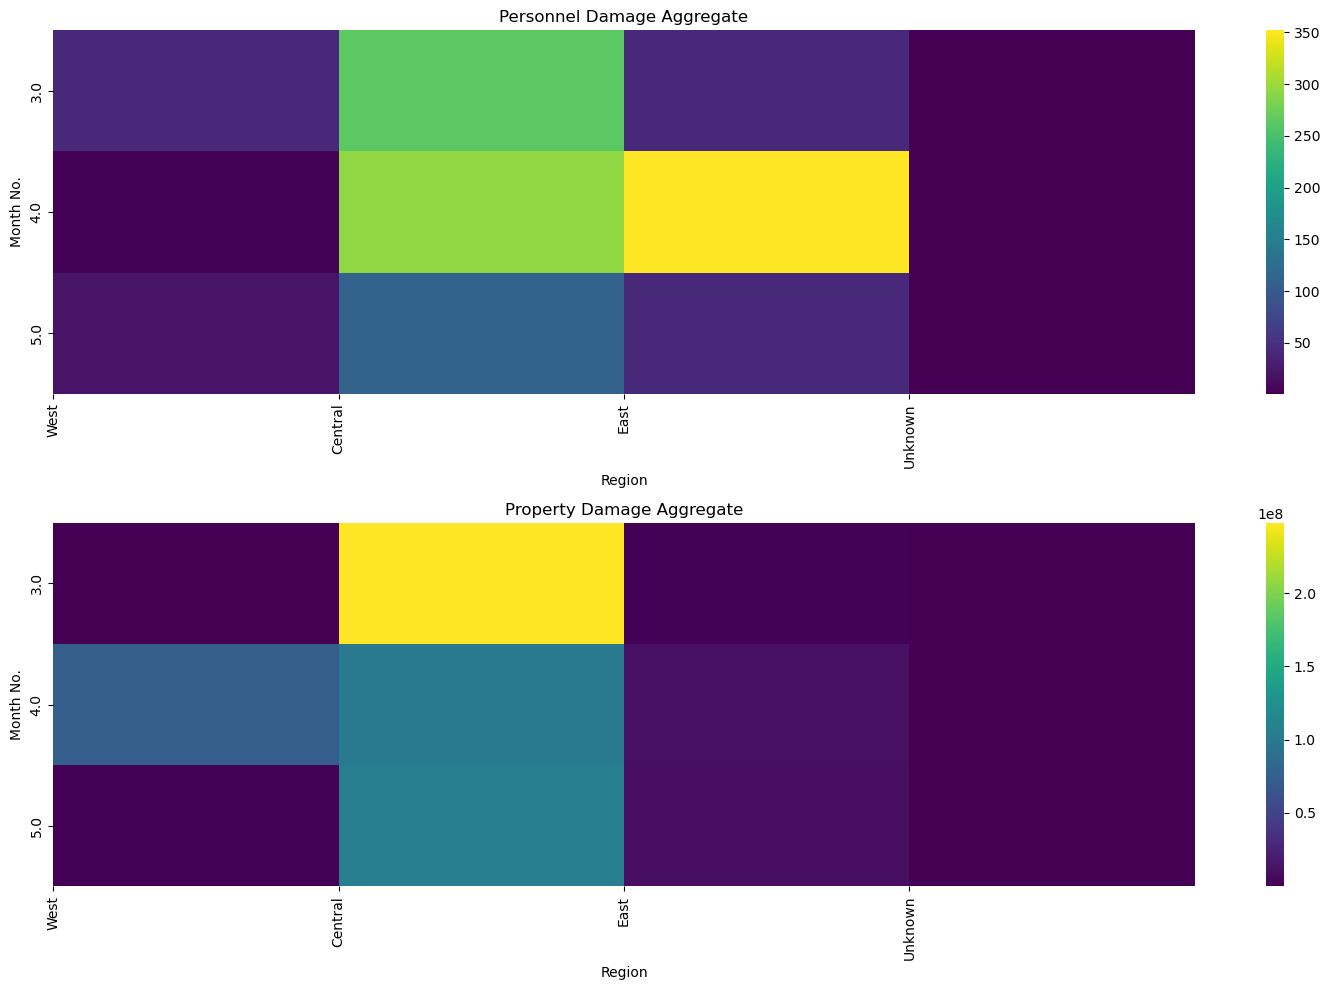

In [90]:
# Acquire proper rows
region_cube_df = cube_df[(cube_df['REGION'].isna()) & (cube_df['BEGIN_MON'].notna()) & (cube_df['TRISECTION'].notna())]
print(region_cube_df.shape)
human_heatmap_data = region_cube_df.pivot(index='BEGIN_MON', columns='TRISECTION', values='TOTAL_HUMAN_DAMAGE').fillna(0)
non_human_heatmap_data = region_cube_df.pivot(index='BEGIN_MON', columns='TRISECTION', values='TOTAL_NON_HUMAN_DAMAGE').fillna(0)

ordered_columns = ['West', 'Central', 'East', 'Unknown']  # Define the desired order
human_heatmap_data = human_heatmap_data[ordered_columns]  # Reorder the columns
non_human_heatmap_data = non_human_heatmap_data[ordered_columns]

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot the human damage heatmap on the first subplot (first row)
sns.heatmap(human_heatmap_data, cmap="viridis", ax=axes[0])
axes[0].set_title("Personnel Damage Aggregate")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Month No.")
tick_positions = range(len(human_heatmap_data.columns))
axes[0].set_xticks(tick_positions)
axes[0].set_xticklabels(human_heatmap_data.columns, rotation=90)

# Plot the non-human damage heatmap on the second subplot (second row)
sns.heatmap(non_human_heatmap_data, cmap="viridis", ax=axes[1])
axes[1].set_title("Property Damage Aggregate")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Month No.")
tick_positions = range(len(non_human_heatmap_data.columns))
axes[1].set_xticks(tick_positions)
axes[1].set_xticklabels(non_human_heatmap_data.columns, rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("./../Images/combined_damage_region_heatmaps_2rows.png", format="png", bbox_inches="tight")

# Display the plot
plt.show()